   ## <font color="#114b98">      <div align="center">         Conception d'une application au service de la santé publique</font>



L'agence **"Santé publique France"** a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation.

Nous présentons d'abord l'idée de l'application en lien avec l'alimentation. Ensuite nous introduisant le jeu de données et leurs traitements pour une préparation à l'analyse univariée et multivariée.




## <font color="#ea1c60">Sommaire</font>  
[1.Présentation de l'idée de l'application](#section_1)

[2.Traitement de jeu de données](#section_2) 

[2.1 Gestion des valeurs manquantes](#section_21)    

[2.2 Variables de catégories](#section_22)     

[2.3 Variables quantitatives](#section_23)    

[2.4 Valeurs aberrantes](#section_24) 

[2.5 Impuation des valeurs manquantes](#section_25) 

[2.5.1 Variables de catégories](#section_251)

[2.5.2 Imputation KNN des Variables numériques](#section_252)

[2.5.3 Imputation de la variable "nutrition_grade_fr"](#section_253)

## <font id="section_1">1. Présentation de l'idée de l'application</font>
 

De nos jours, le régime végétarien et végétalien deviennent de plus en plus répandus ausein la société française. Pour des raisons éthiques, écologie et santé, ce type de régime exclu tout sorte de produit d'origine animale dans le plan alimentaire. Cela peut conduire à des carrence en certains éléments nutritionelles notament les proteines et les minéreaux comme le fer et le calcium.

Application **nutri-vegan** permet d'abord de savoir si un aliment convient pour un régime végétarien ou végitalien, en fonction des ingrédients d'orogine animale qui les composent. Cette étape est réalisée uns fois scanner le code-barres du produit. En suite l'application popose le score nutritinelle du produits vegan, détaille ses ingrédients et estime sa composition nutritionnelles, notamment les micro-nutriments. L'application ainsi peut recommander d'autre produits de la même famille qui contient plus de teneur en macro et micro-nutriments notamment le fer le calcium et de la vitamine c.

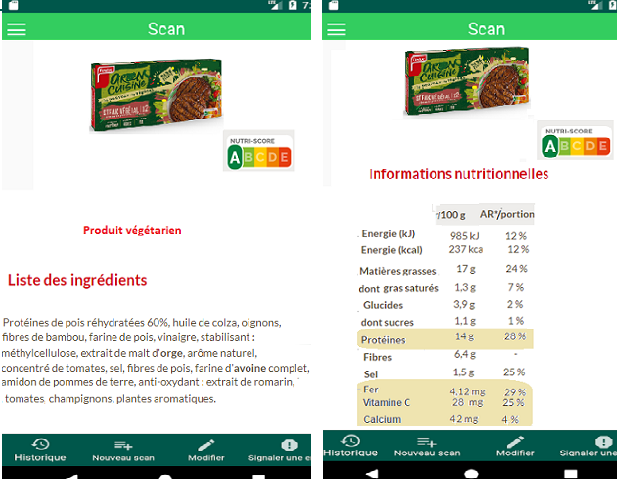

En pratique les étiquetes se contentent d'afficher seulemnt les informations caloriques des produits à savoir les protéines, les graisses et les sucres. En se basant sur les ingrédients du produit, on peut estimer aussi sa teneur en micro-nutriments. Ainsi proposer au consommateur des produits de la même famille avec plus de score nutritionnelle et avec plus de micro nutriments.

## <font id="section_2"> 2. Traitement de jeu de données

Il s'agit d'un ensemble de données de produits alimentaires répertoriant les ingrédients et les informations nutritionnelles
de plus de 300 000 aliments provenant de plus de 150 pays dans le monde. Le jeu de données contient plus de 300 000 lignes sur 163 colonnes. 
Les colonnes divisées en deux ensembles da variables qualitatives et quantitatives. Cependant, comme nous le verrons, il y a beaucoup de valeurs manquantes ou manifestement incorrectes.

Les variables qualitatives se résument en deux grandes parties:

Les informations générales sur la fiche du produit : nom, date de création et de modification, les contributeurs les pays des produits et ses marques...
Un ensemble de tags : catégorie du produit, localisation, origine...

Les ingrédients composant les produits et leurs additifs éventuels et les teneurs nutritionnelles par 100g.

Les variables quantitatives compte en général, des informations macro et micro-nutritionnelles : quantité en grammes d'un nutriment pour 100 grammes d'un produit.



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
import scipy.stats as stats
import matplotlib.pyplot as plt

Importation du jeu de données:

In [3]:
data_food =  pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t',low_memory=False)

In [4]:
data_food.shape

(320772, 162)

Le jeu de données compte 320772 lignes et 162 variables (colonnes)

In [5]:
data_food.dtypes.value_counts()

float64    106
object      56
dtype: int64

Les colonnes comptent 56 variables qualitatives et 106 quantitatives (discrètes et continues)

In [50]:
pd.set_option("display.max_columns", None)
data_food.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ]

 ### <font id="section_21">2.1. Gestion des valeurs manquantes </font>

Nous allons représenter le pourcentage de colonnes vides graphiquement par un diagramme en barre. Nous fixons un seuil de remplissage à 25% pour récupérer les colonnes qui ont au plus un pourcentage de 75% de valeurs manquantes. La ligne verticale (en bleu) dans le diagramme ci-dessous coupe les colonnes qui seront supprimées.

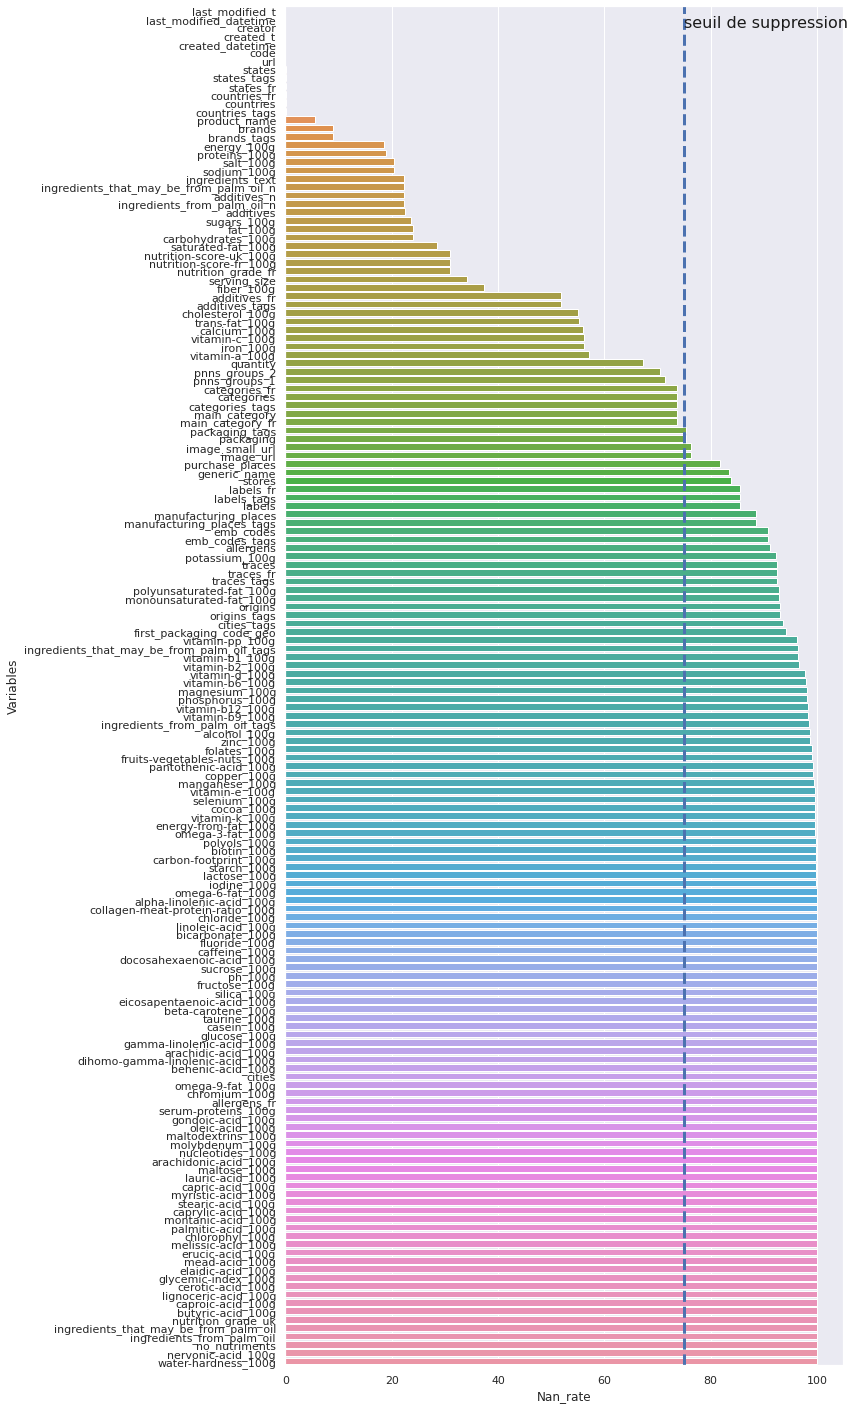

In [51]:
Nan_counts = data_food.isnull().sum().reset_index()
Nan_counts.columns = ['Variables','Nan_rate']
Nan_counts['Nan_rate']=Nan_counts['Nan_rate']*100/len(data_food)
sns.set(font_scale=1)
plt.figure(figsize=(10,25))
ax = sns.barplot(x="Nan_rate", y="Variables", data=Nan_counts, order=Nan_counts.sort_values('Nan_rate').Variables)
plt.axvline(x = 75, color = 'b', ls='--', lw=3)
plt.annotate('seuil de suppression', xy = (75, 2), fontsize = 16, color = 'k')
plt.show()

In [52]:
# On supprime les colonnes contenant  au plus 75% des données manquantes
data = data_food.dropna(thresh=int(data_food.shape[0]*0.25), axis=1)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 50 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     320749 non-null  object 
 1   url                                      320749 non-null  object 
 2   creator                                  320770 non-null  object 
 3   created_t                                320769 non-null  object 
 4   created_datetime                         320763 non-null  object 
 5   last_modified_t                          320772 non-null  object 
 6   last_modified_datetime                   320772 non-null  object 
 7   product_name                             303010 non-null  object 
 8   quantity                                 104819 non-null  object 
 9   brands                                   292360 non-null  object 
 10  brands_tags                     

Notre nouveau jeu de données compte  50 variables et 320772 lignes. De plus ces dernières ne contiennent aucun doublon: 

In [54]:
data.duplicated().sum()

0

 ### <font id="section_22">2.2. Variables de catégories </font>

Le jeu de données réduit de données manquantes contient  30 variables qualitatives contenant aussi des modalités manquantes. L'imputation classique peut conduire à un imbalance des données. De plus, chaque produit est unique avec son code et sa teneur nutritionnelles

In [55]:
 data.select_dtypes('object').columns.to_list()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'quantity',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'serving_size',
 'additives',
 'additives_tags',
 'additives_fr',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'states_fr',
 'main_category',
 'main_category_fr']

D'abord nous supprimons les variables d'étiquetage et certaines variables de dates, nous garderons certaines colonnes qui semblent pertinentes pour notre traitement.

In [56]:
Col_obj = ['code','creator','product_name','brands','categories_fr','countries_fr','ingredients_text','additives_fr','nutrition_grade_fr','main_category_fr']
data=data.drop(data.select_dtypes('object').columns.drop(Col_obj),axis=1)


<font id="section_3"> Pays de provenance </font>

Regardons tout d'abord les pays les plus représentés dans le jeu de données réduit:

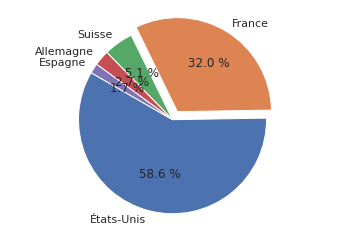

In [57]:
countries= data.countries_fr.value_counts().head(5)
fig, ax = plt.subplots()
sns.set(font_scale=1)
ax.pie(countries, labels=countries.index, explode=(0, 0.1, 0, 0, 0),autopct='% 1.1f %%', startangle=150)
ax.axis('equal')
plt.show()

Comme nous pouvons le voir, la plupart des produits proviennent de France et des États-Unis.
Afin de garder le jeu de données le plus homogène possible, nous allons filtrer notre jeu de données suivant les cinq premiers pays représentés.
Ceci permet aussi de supprimer des pays "fantômes" et mal renseignés de la base de données. 

In [58]:
countries_index=data['countries_fr'].value_counts().head(5).to_frame().index
data = data[data.countries_fr.isin(countries_index)]

In [59]:
data.countries_fr.value_counts()

États-Unis    172998
France         94392
Suisse         14953
Allemagne       7870
Espagne         5009
Name: countries_fr, dtype: int64

 ### <font id="section_23">2.3. Variables quantitatives </font>
Le jeu de données réduit de données manquantes contient  20 variables quantitatives contenant différentes erreurs avec une corrélation plus ou moins importantes.

In [60]:
 data.select_dtypes('float64').columns.to_list()

['additives_n',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g']

Nous allons renommer certaines variables numériques qui sont suffixées avec "_100g" pour changer le tiré " -" par " _" afin d'éviter toute éventuelle erreur de compilation dans la suite.

In [61]:
col_num = data.select_dtypes('float64').columns

for j in range(0,len(col_num)):
    if "-" in col_num[j]: 
        data = data.rename(columns={ col_num[j] : col_num[j].replace('-','_')}) 

In [62]:
data.select_dtypes('float64').columns

Index(['additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated_fat_100g', 'trans_fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin_a_100g', 'vitamin_c_100g',
       'calcium_100g', 'iron_100g', 'nutrition_score_fr_100g',
       'nutrition_score_uk_100g'],
      dtype='object')

On supprime la colunne 'trans_fat_100g' puisque la majorité des valeurs sont nulles. Cette colonne a un point commun  avec le 'cholesterol_100g'. On supprime aussi la colonne 'vitamin_c_100g'.
Nous retenons les  variables  'vitamin_a_100g' et 'iron_100g' puisque la vitamine C est importante pour l'absorption du fer par le coprs. On supprime aussi la variable aléatoire discrète  'ingredients_from_palm_oil_n'. 

In [63]:
data = data.drop(['ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n', 'additives_n','trans_fat_100g','vitamin_a_100g'], axis=1)

In [64]:
data.describe()

,energy_100g,fat_100g,saturated_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin_c_100g,calcium_100g,iron_100g,nutrition_score_fr_100g,nutrition_score_uk_100g
count,2.510570e+05,234080.000000,221174.000000,143526.000000,233810.000000,236488.000000,195072.000000,250070.000000,246944.000000,246900.000000,140202.000000,139994.000000,139760.000000,213214.000000,213214.000000
mean,1.141427e+03,12.687791,5.102747,0.020102,32.101850,16.005656,2.856944,7.080298,2.051322,0.807750,0.023324,0.124251,0.003482,9.156026,9.058636
std,6.572863e+03,17.569114,7.982191,0.358758,29.782784,22.394071,13.033953,8.447826,130.468261,51.370031,2.241588,3.325663,0.208420,9.042849,9.163333
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000,-0.002100,0.000000,-0.000260,-15.000000,-15.000000
25%,3.770000e+02,0.000000,0.000000,0.000000,6.000000,1.300000,0.000000,0.600000,0.063500,0.025000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.100000e+03,5.000000,1.790000,0.000000,20.750000,5.700000,1.500000,4.710000,0.589280,0.232283,0.000000,0.035000,0.001010,10.000000,9.000000
75%,1.674000e+03,20.000000,7.140000,0.020000,58.330000,24.000000,3.600000,10.000000,1.391920,0.548000,0.003600,0.105000,0.002400,16.000000,16.000000
max,3.251373e+06,714.290000,550.000000,95.238000,2916.670000,3520.000000,5380.000000,430.000000,64312.800000,25320.000000,716.981100,694.737000,50.000000,40.000000,40.000000


## <font id="section_24">2.4 Valeurs aberrantes</font>

Le jeu de données Contient encore plusieurs valeurs manquantes, en particulier dans les variables 
quantitatives. Ces dernières seront estimées par imputation dans la suite. 

Le tableau de description montre que le jeu de données numériques contiennent des valeurs aberrantes notamment des valeurs 
négatives et d'autres impossibles comme des valeurs maximales de certains nutriments qui ne peuvent pas dépasser 100g de teneur par 100g de poids. Le cas du sel,  le sucre  et l'huile on remet ces valeurs maximales à la valeur 100.


In [65]:
# les colonnes qui ont une valeur maximale impossible
Var_nutriment=['fat_100g','saturated_fat_100g','carbohydrates_100g','sugars_100g','salt_100g']         
data[Var_nutriment] = data[Var_nutriment].mask(data[Var_nutriment]>100,100)

La variable 'energy_100g' ne peut pas dépasser  la valeur 3700 kj par 100g de macro-nutriments.

In [66]:
data['energy_100g'] = data['energy_100g'].mask(data['energy_100g']>3700,3700)

Le teneur en sodium dans un élément donné ne peut pas dépasser 40g par 100g de teneur de nutriments.

In [67]:
data['sodium_100g'] = data['sodium_100g'].mask(data['sodium_100g']>40,40)

In [68]:
index = data['sugars_100g']<0
data['carbohydrates_100g'].values[index]

array([ 3.61,  7.2 , 21.43, 66.67,  5.  , 53.57,  0.8 ])

Les produits dont la valeurs de sucre est négatives contients de quantités non nulle de carbohydrate.
On prend alors la valeur absolue de ces dernières et de même pour le teneur en fibre. 
Aussi pour la variable de teneurs en vitamine.

In [69]:
data['sugars_100g']=data['sugars_100g'].mask(data['sugars_100g']<0,abs(data['sugars_100g']))

In [70]:
index = data['fiber_100g']<0
data['product_name'].values[index]

array(['Traditional Tender Cracklins Chicharrones'], dtype=object)

In [71]:
data['fiber_100g']=data['fiber_100g'].mask(data['fiber_100g']<0,abs(data['fiber_100g']))
data['vitamin_c_100g']=data['vitamin_c_100g'].mask(data['vitamin_c_100g']<0,abs(data['vitamin_c_100g']))
data['iron_100g']=data['iron_100g'].mask(data['iron_100g']<0,abs(data['iron_100g']))

Nom des produits dont la valeur de proteine est négative

In [72]:
index = data['proteins_100g']<0
data['product_name'].values[index]

array(['Whole Cashews', 'Gourmet Blends, Seasoning, Garlic Pepper',
       'Lightly Dried Cilantro'], dtype=object)

Le produit "Whole Cashews" contient en moyenne 15g de proteine par 100g et les autres produits ne contiennent quasiment pas de protéines. 

In [73]:
data['proteins_100g']=data['proteins_100g'].mask(data['product_name']=='Whole Cashews',15)
data['proteins_100g']=data['proteins_100g'].mask(data['proteins_100g']<0,0)

Regardons mainteneant les boites à moustaches des autres variables nen suffixe _100g:

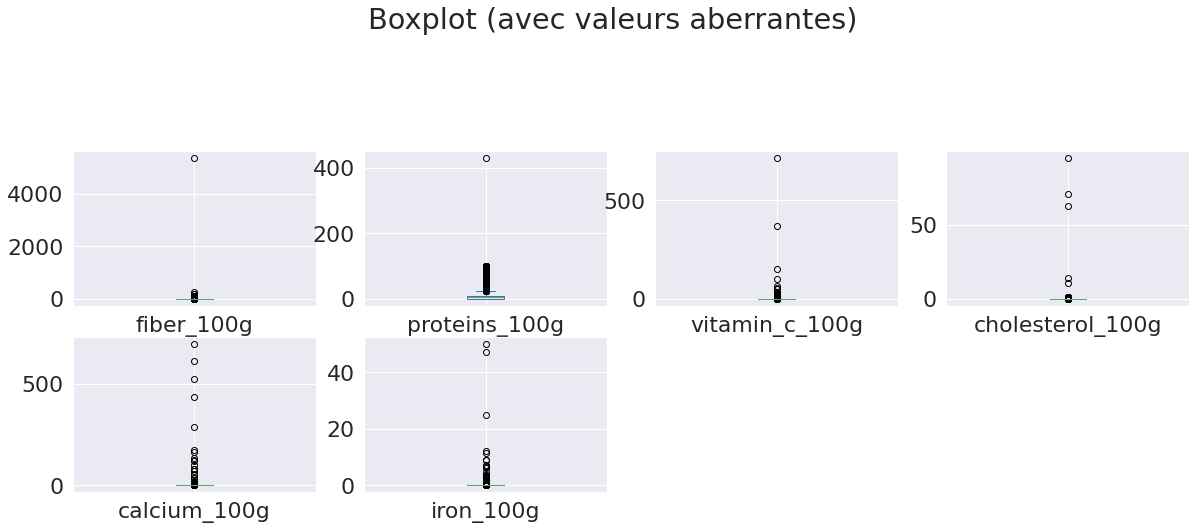

In [74]:
col=['fiber_100g', 'proteins_100g','vitamin_c_100g','cholesterol_100g','calcium_100g','iron_100g']
sns.set(font_scale=2)
data[col].select_dtypes(include=float).plot(kind='box', subplots=True, title='Boxplot (avec valeurs aberrantes)', figsize=(20,20), layout=(6,4))
plt.show()

les valeaurs dont la fréquence est supérieur à 0.96 pour la colonnes    ['fiber_100g', 'proteins_100g','vitamin_c_100g','cholesterol_100g','calcium_100g','iron_100g'] seront supprimées.

In [75]:
for c in col:
  upper_lim = data[c].quantile(0.96)
  ind = data.index[data[c] > upper_lim]   
  data = data.drop(ind , axis=0)

In [76]:
data.shape

(261852, 25)

In [77]:
data.describe()

,energy_100g,fat_100g,saturated_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin_c_100g,calcium_100g,iron_100g,nutrition_score_fr_100g,nutrition_score_uk_100g
count,217774.000000,202124.000000,189863.000000,117434.000000,201845.000000,205133.000000,165467.000000,216887.000000,213981.000000,213939.000000,113998.000000,113661.000000,113385.000000,183324.000000,183324.000000
mean,1073.185393,11.802340,4.579299,0.011871,32.257240,16.643872,2.178524,5.612798,1.616783,0.637074,0.003419,0.051905,0.001234,8.797010,8.669558
std,804.385441,17.305579,7.370213,0.021577,29.071348,21.647191,2.555711,5.907832,6.986541,2.756823,0.007195,0.065222,0.001288,8.947134,9.064450
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.000000,-14.000000
25%,335.000000,0.000000,0.000000,0.000000,6.600000,1.670000,0.000000,0.440000,0.053340,0.021000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1000.000000,4.000000,1.670000,0.000000,20.800000,6.250000,1.400000,3.850000,0.518160,0.204724,0.000000,0.026000,0.000900,9.000000,9.000000
75%,1644.000000,17.860000,6.670000,0.015000,58.330000,25.000000,3.400000,8.330000,1.270000,0.500000,0.003000,0.085000,0.002060,16.000000,16.000000
max,3700.000000,100.000000,100.000000,0.098000,100.000000,100.000000,10.900000,25.000000,100.000000,40.000000,0.037200,0.333000,0.005140,40.000000,36.000000


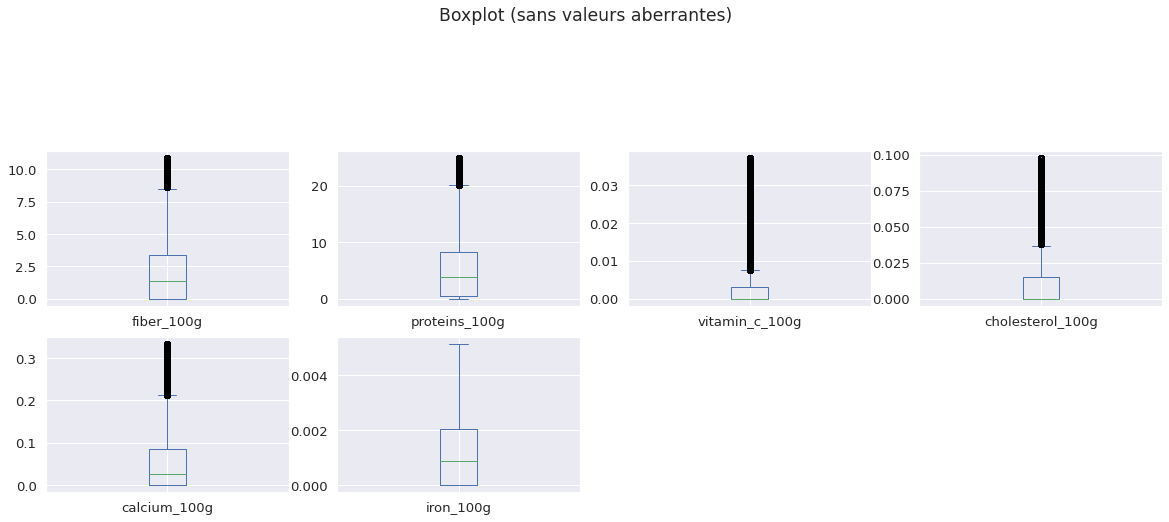

In [78]:
sns.set(font_scale=1.2)
data[col].select_dtypes(include=float).plot(kind='box', subplots=True, title='Boxplot (sans valeurs aberrantes)', figsize=(20,20), layout=(6,4))
plt.show()

On va comparer maintenant la variable target 'nutrition_score_fr_100g' avec 'nutrition_score_uk_100g' et la variable  'sodium_100g' avec 'salt_100g'. La figure suivante trace le nuage de leurs données:

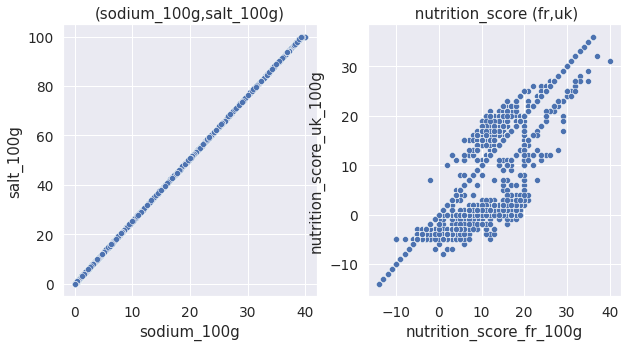

In [79]:
plt.figure(figsize = (10, 5))
sns.set(font_scale=1.25)
ax = plt.subplot(1,2,1)
sns.scatterplot(x=data['sodium_100g'],y=data['salt_100g']).set(title='(sodium_100g,salt_100g)')

ax = plt.subplot(1,2,2)
sns.scatterplot(x=data['nutrition_score_fr_100g'],y=data['nutrition_score_uk_100g']).set(title=' nutrition_score (fr,uk)')

plt.show()

On remarque comme prévu que les données du couple ('sodium_100g' et 'salt_100g') représente une droite affine ainsi on peut supprimer l'une des deux variables. Aussi il est clair que la corrélation est égale à 1 entre  la variabale target 'nutrition_score_fr_100g' avec 'nutrition_score_uk_100g'. Probablement il y a une légère différence entre le calcul de chacun de ces deux variables comme elles coincident sur une large produits. 

In [80]:
data = data.drop(['nutrition_score_uk_100g','sodium_100g'], axis=1)

In [81]:
data.describe()

,energy_100g,fat_100g,saturated_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin_c_100g,calcium_100g,iron_100g,nutrition_score_fr_100g
count,217774.000000,202124.000000,189863.000000,117434.000000,201845.000000,205133.000000,165467.000000,216887.000000,213981.000000,113998.000000,113661.000000,113385.000000,183324.000000
mean,1073.185393,11.802340,4.579299,0.011871,32.257240,16.643872,2.178524,5.612798,1.616783,0.003419,0.051905,0.001234,8.797010
std,804.385441,17.305579,7.370213,0.021577,29.071348,21.647191,2.555711,5.907832,6.986541,0.007195,0.065222,0.001288,8.947134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.000000
25%,335.000000,0.000000,0.000000,0.000000,6.600000,1.670000,0.000000,0.440000,0.053340,0.000000,0.000000,0.000000,1.000000
50%,1000.000000,4.000000,1.670000,0.000000,20.800000,6.250000,1.400000,3.850000,0.518160,0.000000,0.026000,0.000900,9.000000
75%,1644.000000,17.860000,6.670000,0.015000,58.330000,25.000000,3.400000,8.330000,1.270000,0.003000,0.085000,0.002060,16.000000
max,3700.000000,100.000000,100.000000,0.098000,100.000000,100.000000,10.900000,25.000000,100.000000,0.037200,0.333000,0.005140,40.000000


### <font id="section_25">2.5 Impuation des valeurs manquantes </font>
####  <font id="section_251">2.5.1 Variables de catégories

On peut voir qu'il reste encore des colonnes de variables quantitatives contenant des modalités manquantes. 

In [82]:
data.select_dtypes('object').isna().sum()

code                       0
creator                    0
product_name           12549
brands                 21386
categories_fr         193393
countries_fr               0
ingredients_text       54670
additives_fr          129492
nutrition_grade_fr     78528
main_category_fr      193393
dtype: int64

On remplace les modalités manquantes par un mot désignant le manque de l'information. On se concentre dans la suite d'imputer les variables quantitatives. Concernat la variable "**nutrition_grade_fr**",
on compètera les valeurs manquantes en se basant sur l'imputation de la variable 
"**nutrition_score_fr_100g**".

In [83]:
data['product_name'].fillna(value='name_non-available', inplace=True)
data['main_category_fr'].fillna(value='not_mentioned ', inplace=True)
data['brands'].fillna(value='unkown_brand ', inplace=True)
data['ingredients_text'].fillna(value='not_mentioned', inplace=True)
data['categories_fr'].fillna(value='not_mentioned ', inplace=True)
data['additives_fr'].fillna(value='not_mentioned ', inplace=True)

####  <font id="section_252">2.5.2 Imputation KNN des Variables numériques

D'aprse le tableau ci-desus de des statistiques résumées des données montre que les variables ne suivant pas une distribution Gaussienne, comme le montre la representation de quelque variables. Il est ainsi préferables d'éviter l'imputation
simple par la moyenne ou par la médiane. On propose ainssi une imputation par l'algorthme KNN.

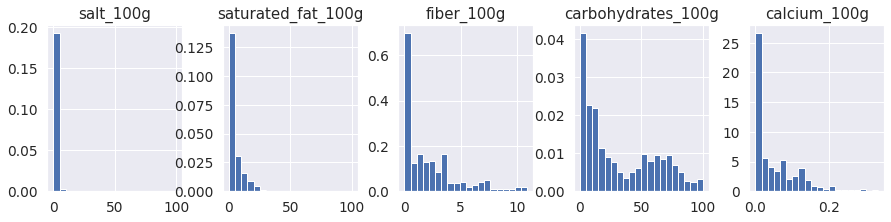

In [84]:
c=['salt_100g','saturated_fat_100g','fiber_100g','carbohydrates_100g','calcium_100g']
data[c].hist(density=1, bins=20,figsize=(15,15), layout=(4,5))
plt.show()

Comparons d'abord l'impuation par la moyenne et par de la médiane 

In [85]:
df_mean_imp=data.copy()


for col in data.select_dtypes('float64'):
    imputer = SimpleImputer(missing_values = np.nan,strategy ='mean')
    df_mean_imp[col] = imputer.fit_transform(df_mean_imp[col].values.reshape(-1,1))[:,0]
            
df_mean_imp.describe()

,energy_100g,fat_100g,saturated_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin_c_100g,calcium_100g,iron_100g,nutrition_score_fr_100g
count,261852.000000,261852.000000,261852.000000,261852.000000,261852.000000,261852.000000,261852.000000,261852.000000,261852.000000,261852.000000,261852.000000,261852.000000,261852.000000
mean,1073.185393,11.802340,4.579299,0.011871,32.257240,16.643872,2.178524,5.612798,1.616783,0.003419,0.051905,0.001234,8.797010
std,733.565842,15.204316,6.275842,0.014450,25.523838,19.159807,2.031604,5.376712,6.315703,0.004748,0.042971,0.000847,7.486267
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.000000
25%,423.000000,0.500000,0.200000,0.000000,10.000000,2.650000,0.700000,1.000000,0.100000,0.000000,0.042000,0.001200,3.000000
50%,1073.185393,11.000000,4.579299,0.011871,32.257240,13.000000,2.178524,5.612798,0.845820,0.003419,0.051905,0.001234,8.797010
75%,1536.000000,13.000000,4.579299,0.011871,50.000000,16.670000,2.178524,7.140000,1.616783,0.003419,0.051905,0.001234,13.000000
max,3700.000000,100.000000,100.000000,0.098000,100.000000,100.000000,10.900000,25.000000,100.000000,0.037200,0.333000,0.005140,40.000000


In [86]:
df_med_imp=data.copy()


for col in data.select_dtypes('float64'):
    imputer = SimpleImputer(missing_values = np.nan,strategy ='median')
    df_med_imp[col] = imputer.fit_transform(df_med_imp[col].values.reshape(-1,1))[:,0]
            
df_med_imp.describe()

,energy_100g,fat_100g,saturated_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin_c_100g,calcium_100g,iron_100g,nutrition_score_fr_100g
count,261852.000000,261852.000000,261852.000000,261852.000000,261852.000000,261852.000000,261852.000000,261852.000000,261852.000000,261852.000000,261852.000000,261852.000000,261852.000000
mean,1060.865969,10.022639,3.779468,0.005324,29.631655,14.392486,1.891958,5.310092,1.415936,0.001489,0.037244,0.001045,8.857885
std,734.076754,15.552805,6.408854,0.015609,25.974115,19.632375,2.066009,5.417657,6.329962,0.005041,0.044848,0.000863,7.486845
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.000000
25%,423.000000,0.500000,0.200000,0.000000,10.000000,2.650000,0.700000,1.000000,0.100000,0.000000,0.026000,0.000900,3.000000
50%,1000.000000,4.000000,1.670000,0.000000,20.800000,6.250000,1.400000,3.850000,0.518160,0.000000,0.026000,0.000900,9.000000
75%,1536.000000,13.000000,3.980000,0.000000,50.000000,16.670000,2.100000,7.140000,1.076960,0.000000,0.026000,0.000900,13.000000
max,3700.000000,100.000000,100.000000,0.098000,100.000000,100.000000,10.900000,25.000000,100.000000,0.037200,0.333000,0.005140,40.000000


Comme prévu l'imputation simple par la moyenne préserve la moyenne et l'imputation par la médiane préserve la médiane. Nous allons imputer avec l'algorithme des K Nearest Neighbours (KNN).

In [87]:
# On divise les colonnes en deux ensembles 
col = data.select_dtypes('float64').columns
col_macro = col.drop(['calcium_100g','energy_100g','cholesterol_100g','vitamin_c_100g', 'iron_100g'])
col_micro =['cholesterol_100g','vitamin_c_100g', 'calcium_100g', 'iron_100g']


D'abord, on réalise l'imputation sur deux jeux de données séparées, afin de réduire le problème de la grande dimensionnalité, aussi que les variables dans les colonnes "col_micro" ont des valeurs proches de zéros en comparaison avec celles de la colonne "col_macro". La variable "energy_100 g" sera calculée à partir des autres colonnes de macro-nutriments.

In [88]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data[col_macro], test_size=0.20) 
model = KNNImputer(n_neighbors=5, missing_values=np.nan)
model.fit(X_train)
df_imp1 = model.transform(data[col_macro])
df_imp1 = pd.DataFrame(df_imp1, columns=col_macro)

Ensuite, on réalise l'imputation sur le deuxième jeu de données

In [89]:
X_train, X_test = train_test_split(data[col_micro], test_size=0.20) 
model.fit(X_train)
df_imp2 = model.transform(data[col_micro])
df_imp2 = pd.DataFrame(df_imp2, columns=col_micro)

In [90]:
#Concatenation des deux ensembles et affectation
df_knn = pd.concat([df_imp1, df_imp2], axis=1)
for col in df_knn.columns:
   data[col] = df_knn[col].values

On calcule les valeurs manquantes de la variable "energy_10g" à partir des colonnes "carbohydrates_100g", "fat_100g" et "proteins_100g":

In [91]:
# Calcul des valeaurs manquantes de la variable "energy_100g"
mask = data['energy_100g'].isna() 
energy = (4*data['carbohydrates_100g'][mask]+9*data['fat_100g'][mask]+4*data['proteins_100g'][mask])*4.1868
data.loc[mask, 'energy_100g'] = energy

In [92]:
data.isna().sum()

code                           0
creator                        0
product_name                   0
brands                         0
categories_fr                  0
countries_fr                   0
ingredients_text               0
additives_fr                   0
nutrition_grade_fr         78528
main_category_fr               0
energy_100g                    0
fat_100g                       0
saturated_fat_100g             0
cholesterol_100g               0
carbohydrates_100g             0
sugars_100g                    0
fiber_100g                     0
proteins_100g                  0
salt_100g                      0
vitamin_c_100g                 0
calcium_100g                   0
iron_100g                      0
nutrition_score_fr_100g        0
dtype: int64

#### <font id="section_253">2.5.3 Imputation de la variable "nutrition_grade_fr"


Le nutri-grade est un système d'étiquetage nutritionnel à cinq niveaux (a, b, c, d et e). Il est attribué à un produit alimentaire  en fonction de sa valeur nutritionnelle d'un produit alimentaire. Le bus est de permettre aux consommateurs d'identifier les produits plus sains d'un point de vue nutritionnel.

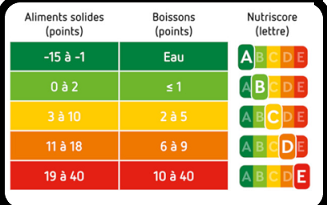

Nous pouvons maintenant calculer les valeurs manquantes de la variable "nutrition_grade_fr" à partir des valeurs imputées de la colonne  "nutrition_score_fr_100g".

In [93]:
# nutir_grade pour les produits solides
def nutri_grade_solid(col):
    if col <= -1 :
        nutri_grade = "a"
    elif ((col >= 0) & (col <= 2)) :
        nutri_grade = "b"
    elif ((col >= 3) & (col <= 10)) :
        nutri_grade = "c"
    elif ((col >= 11) & (col <= 18)) :
        nutri_grade = "d"
    else:
        nutri_grade = "e"
        
    return nutri_grade

# nutir_grade pour les produits boissons
def nutri_grade_beverage(col):
    if col <= -1 :
        nutri_grade = "a"
    elif ((col >= 0) & (col <= 1)) :
        nutri_grade = "b"
    elif ((col >= 2) & (col <= 5)) :
        nutri_grade = "c"
    elif ((col >= 6) & (col <= 9)) :
        nutri_grade = "d"
    else:
        nutri_grade = "e"
        
    return nutri_grade

#le nutri-grade pour les eaux 
mask_water = data['main_category_fr'].str.contains('Eaux')
data['nutrition_grade_fr'] = data['nutrition_grade_fr'].mask(mask_water,'a')
#le nutri-grade pour les boissons 
mask_b = data['main_category_fr'].str.contains('Boissons') + data['main_category_fr'].str.contains('Jus') + data['main_category_fr'].str.contains('Soda')
data.loc[mask_b, 'nutrition_grade_fr'] = data['nutrition_score_fr_100g'][mask_b].apply(lambda col: nutri_grade_beverage(col))
#le nutri-grade pour les produits solides
mask_s = data['nutrition_grade_fr'].isna()
data.loc[mask_s, 'nutrition_grade_fr'] = data['nutrition_score_fr_100g'][mask_s].apply(lambda col: nutri_grade_solid(col))

In [94]:
data.isna().sum()

code                       0
creator                    0
product_name               0
brands                     0
categories_fr              0
countries_fr               0
ingredients_text           0
additives_fr               0
nutrition_grade_fr         0
main_category_fr           0
energy_100g                0
fat_100g                   0
saturated_fat_100g         0
cholesterol_100g           0
carbohydrates_100g         0
sugars_100g                0
fiber_100g                 0
proteins_100g              0
salt_100g                  0
vitamin_c_100g             0
calcium_100g               0
iron_100g                  0
nutrition_score_fr_100g    0
dtype: int64

In [95]:
data.to_csv(r'/content/drive/MyDrive/Cleaned_data_food.csv', sep='\t', index=False)